# Chapter 1: Manipulating Numpy Arrays

This notebook follows along with the sci-py lecture notes <a href="http://www.scipy-lectures.org/intro/numpy/array_object.html">here.</a>.
Arrays at the core are lists, but they are heavily optimized. Additionally, these arrays can represent more complicated objects, such as tensors, matricies, etc.

In [1]:
# special notebook mode plots
% matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array(list(range(10)))
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Memory Efficient  Speedy Operations
Numpy arrays are written in C, and thus are memory efficient and fast. As an example, see vanilla iteration below:

Vanilla list iteration using python3 and magic commands:

In [3]:
# An example of timing operations in python
L1 = list(range(1000))
%timeit [i**2 for i in L1]

The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 61.5 µs per loop


### An Aside - Notebook Magic
Jupyter notebooks is a descendent of the iPython shell, which is somewhat similar to the ROOT CINT environment. The iPython shell is a beefy python interpreter with a lot of extra functionality not found in the vanilla python shell. One function is the concept of <a href="https://ipython.org/ipython-doc/3/interactive/magics.html">'magic commands'</a>, which allows for extra functionality, such as switching directories, timing a process, etc. Thus, '%timeit' is one such functionality - it times whatever follows (I assume on one line)?

## Now observe timing with Numpy
similar to python's range, numpy's arange generates a list of values. Although in python3, range switched from returning a list to returning an iterable, which offers better performance for things like <pre> if my_num in range(10**10) </pre> Numpy's arange also supports more advanced options, such as specifying beginnings, ends, step sizes, etc to really customize the range of numbers generated.

<pre>
numpy.arange([start, ]stop, [step, ]dtype=None)
</pre>

In [4]:
# An Example of timing operations in python with numpy
# a range is like 'range' but it returns an array. It has additional features as well:

# Examples
print("numpy.arange(10)",np.arange(10))
print("numpy.arange(start=0,stop=2.5,step=0.25)",np.arange(start=0,stop=2.5,step=0.25))
print("numpy.arange(start=5, stop=15)", np.arange(5,15))

('numpy.arange(10)', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
('numpy.arange(start=0,stop=2.5,step=0.25)', array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25]))
('numpy.arange(start=5, stop=15)', array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))


In [5]:
# An example of timing with numpy
L2 = np.arange(1000)
%timeit [i**2 for i in L2]

1000 loops, best of 3: 170 µs per loop


## Documentation Features
Of course, numpy is fully documented at <a href="http://docs.scipy.org">docs.scipy.org</a>, but one can access help interactively:

In [6]:
np.lookfor("create array")
np.array?

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
numpy.lib.ar

In [7]:
# support for wildcards, too!
np.con*?

## Creating Numpy Arrays In Arbitrary Dimensions, Plus Shape
### Manually
np.array.ndim: gives the dimensionality of the array - i.e. does it contain 1D objects, 2D objects, etc?
np.array.shape: gives the 'shape' of an array - i.e. how many 'rows' and 'columns' does it have? For 1D arrays, the shape only has one dimension, so the output will look like <pre> <#rows>, </pre> with no entry for columns. For higher dimension, you get the overall 'shape' i.e. the number of rows per dimension.

For mixed dimensional np.arrays, it seems that the arrays are treated as 1D objects.

In [8]:
# One Dimension
print("1D Operations:")
a = np.array([0,1,2,3])
print("a.ndim",a.ndim )
print("a.shape",a.shape)
print("\n")

# Two Dimensions
print("2D Operations")
b = np.array([[1,2],[3,4],[5,6]]) # 3 x 2 array
print("b.ndim", b.ndim)
print("b.shape", b.shape)
print("Transposition is supported for b, before:\n",b)
c = b.transpose()
print("After:\n",c)
print("\n")

# What about mixed dimensions?
print("Mixed 1/2 Dimensions")
d = np.array([[2,3],[1,6,12],[4,5]])
print("d.ndim", d.ndim)
print("d.shape", d.shape)
print("Transposition is supported for d, before:\n",d)
e = d.transpose()
print("After:\n",e)
print("\n")

# 3D 
print("3D Operations")
f = np.array([[[1], [2]], [[3], [4]]])
print("f",f)
print("f.ndim",f.ndim)
print("f.shape",f.shape)

# Exploration
# len vs shape
print(len(a),a.shape)
print(len(b),b.shape)
print(len(c),c.shape)
print(len(d),d.shape)
print(len(f),f.shape)

1D Operations:
('a.ndim', 1)
('a.shape', (4,))


2D Operations
('b.ndim', 2)
('b.shape', (3, 2))
('Transposition is supported for b, before:\n', array([[1, 2],
       [3, 4],
       [5, 6]]))
('After:\n', array([[1, 3, 5],
       [2, 4, 6]]))


Mixed 1/2 Dimensions
('d.ndim', 1)
('d.shape', (3,))
('Transposition is supported for d, before:\n', array([[2, 3], [1, 6, 12], [4, 5]], dtype=object))
('After:\n', array([[2, 3], [1, 6, 12], [4, 5]], dtype=object))


3D Operations
('f', array([[[1],
        [2]],

       [[3],
        [4]]]))
('f.ndim', 3)
('f.shape', (2, 2, 1))
(4, (4,))
(3, (3, 2))
(2, (2, 3))
(3, (3,))
(2, (2, 2, 1))


#### Exercises
1. Create 2D array. Odd numbers on top row, even number on the second number.
2. Use len() and numpy.array.shape on this array. What is the relationship between len(), numpy.array.shape and numpy.array.ndim?

In [9]:
# Solution 1
arr_solution_1 = np.array([[n for n in range(10) if n %2 != 0],[n for n in range(10) if n%2 == 0]])

def compare(arr):
    """
    for a numpy array arr, compare python's build in len, 
    numpy.array.shape and numpy.array.ndim
    """
    print(arr)
    print("len: ", len(arr), "shape:", arr.shape, "ndim:", arr.ndim)
    return
compare(arr_solution_1)
arr_solution_2 = np.array([[n for n in range(1,4)],[n for n in range(4,7)],[n for n in range(7,10)]])
compare(arr_solution_2)

[[1 3 5 7 9]
 [0 2 4 6 8]]
('len: ', 2, 'shape:', (2, 5), 'ndim:', 2)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
('len: ', 3, 'shape:', (3, 3), 'ndim:', 2)


### Functions for Creating Arrays

##### Evenly Spaced Arrays

In [10]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

##### Create Arrays with Specific Number of Points

In [11]:
b = np.linspace(0,1,6)
b

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

##### Common Arrays

In [12]:
a = np.ones((3,3)) # from tuple!
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
b = np.zeros((2,2))
b

array([[ 0.,  0.],
       [ 0.,  0.]])

##### Diagonal Unit Matrix

In [14]:
c = np.eye(3)
c

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

##### Diagonal Matricies With Array specifying Diagonals

In [15]:
d = np.diag(np.arange(0,5)) # create with arange
d

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

##### Random Numbers

In [16]:
a = np.random.rand(4) # Uniform in [0,1]
a

array([ 0.22952234,  0.69206563,  0.71770153,  0.04065798])

##### Show with Histogram Plot!

<IPython.core.display.Javascript object>


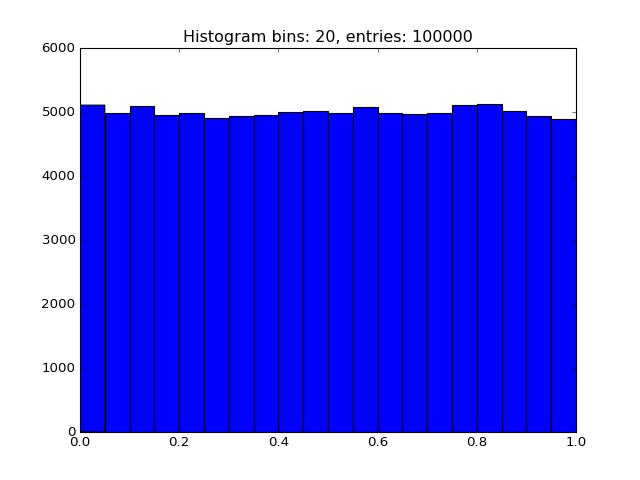

In [28]:
a = np.random.rand(100000) # 1000 random numbers between 0 and 1 using Mersenne Twister PRNG
bins = 20
plt.hist(a, bins=20)  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram bins: {}, entries: {}".format(bins,len(a)))
plt.show()

#### Exercises
1. Experiment with arange, linspace, ones, zeros, eye and diag.
2. Create different kinds of arrays with random numbers.
3. Try setting the seed before creating an array with random values. Look at the function np.empty. What does it do? When might this be useful?

In [33]:
np.zeros((4,10))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

##### Notes
<pre>np.empty()</pre> creates an empty array, without initialization. Whatever was in memory is cast as a number and dumped into an array, if you call print. Zeros initializes everything to zero, but may be slightly slower than empty().

##### linspace
Linspace is like arange, except it creates numbers from start to stop, with a default number of points of 50. The range is subdivided over start and stop. If endpoint (argument) is false, it is not included in the set, but the default is true.

In [48]:
np.linspace(start=1,stop=10,num=10,endpoint=False)

array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1])

In [49]:
np.linspace(start=1,stop=10,num=10,endpoint=True)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [51]:
np.linspace(start=1,stop=10,num=10,endpoint=True,retstep=True)
# now returns a tuple of the np array and the step size

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]), 1.0)